# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 2. Load Train Data 

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df

,id,playtime_forever,is_free,price,genres,categories,tags,purchase_date,release_date,total_positive_reviews,total_negative_reviews
0,0,0.000000,False,3700.0,"Adventure,Casual,Indie","Single-player,Steam Trading Cards,Steam Cloud","Indie,Adventure,Story Rich,Casual,Atmospheric,...","Jul 2, 2018","10 Dec, 2013",372.0,96.0
1,1,0.016667,True,0.0,RPG,"Single-player,Partial Controller Support","Mod,Utilities,RPG,Game Development,Singleplaye...","Nov 26, 2016","12 Aug, 2015",23.0,0.0
2,2,0.000000,False,5000.0,"Adventure,Casual,Indie","Single-player,Full controller support,Steam Tr...","Point & Click,Adventure,Story Rich,Comedy,Indi...","Jul 2, 2018","28 Jan, 2014",3018.0,663.0
3,3,1.533333,False,9900.0,"Action,RPG","Single-player,Multi-player,Steam Achievements,...","Medieval,RPG,Open World,Strategy,Sandbox,Actio...","Nov 28, 2016","31 Mar, 2010",63078.0,1746.0
4,4,22.333333,False,4800.0,"Action,Indie,Strategy","Single-player,Co-op,Steam Achievements,Full co...","Tower Defense,Co-op,Action,Strategy,Online Co-...","Mar 4, 2018","30 Jul, 2012",8841.0,523.0
5,5,2.933333,False,25800.0,RPG,"Single-player,Online Co-op,Local Co-op,Shared/...","RPG,Open World,Survival,Co-op,Fantasy,Online C...",NaN,"26 Mar, 2019",NaN,NaN
6,6,2.616667,False,3600.0,"Action,Indie","Single-player,Steam Achievements,Steam Trading...","Great Soundtrack,Action,Violent,Indie,Top-Down...","Feb 16, 2018","23 Oct, 2012",39776.0,1035.0
7,7,0.150000,True,0.0,Simulation,"Single-player,Multi-player,Online Multi-Player...","VR,Simulation,Utilities,Multiplayer","Jan 29, 2018","28 Apr, 2016",33.0,3.0
8,8,0.016667,False,4000.0,"Adventure,RPG","Single-player,Steam Achievements,Steam Trading...","RPG,Turn-Based,Adventure,Fantasy,Great Soundtr...","Nov 23, 2018","25 Feb, 2014",1875.0,39.0
9,9,0.016667,False,8800.0,"Action,Adventure","Single-player,Steam Achievements,SteamVR Colle...","Action,Adventure,VR,Shooter,Puzzle,FPS,First-P...","Dec 22, 2017","17 Oct, 2017",47.0,11.0


In [5]:
df.isna().sum() #checking for null values - no need to drop any columns as most have non-null values

id                        0
playtime_forever          0
is_free                   0
price                     0
genres                    0
categories                0
tags                      0
purchase_date             2
release_date              0
total_positive_reviews    2
total_negative_reviews    2
dtype: int64

# 3. Preprocessing

# 3.1 Imputation

## Missing Data

In [6]:
threshold = 0.7
#Dropping columns with missing value rate higher than threshold
df = df[df.columns[df.isnull().mean() < threshold]]

#Dropping rows with missing value rate higher than threshold
df = df.loc[df.isnull().mean(axis=1) < threshold]

## Nulls

In [7]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

## Boolean Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002349E2E3550>,
      dtype=object)

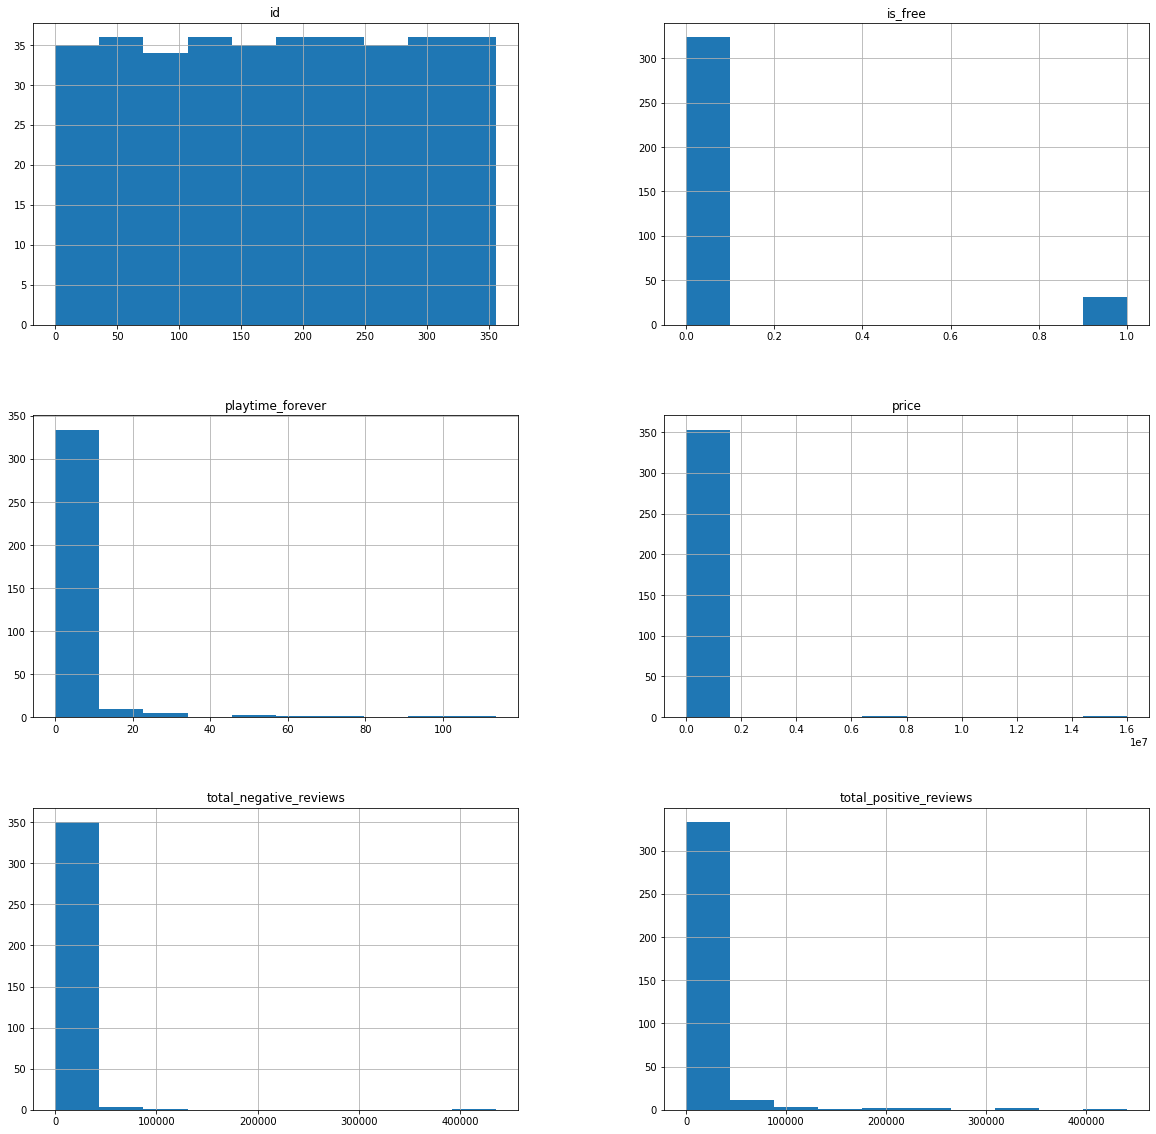

In [8]:
# Replacing columns with f/t with 0/1
df.replace({False: 0, True: 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
df.hist(figsize=(20,20))

## Datetime

In [9]:
# Converting to datetime

# deal with purchase date
df["purchase_date"] = pd.to_datetime(df["purchase_date"])

# deal with release_date
df["release_date"] = pd.to_datetime(df["release_date"]) 

# get the different days between purchase_date and release_date
df["diff_day"] = df.apply(lambda raw: (raw["purchase_date"] - raw["release_date"]).days, axis=1)

# get the different years between purchase_date and release_date
df["diff_year"] = df["purchase_date"].dt.year - df["release_date"].dt.year

# delete purchase_date and release_date
df.drop(columns=["purchase_date", "release_date"], inplace=True)


# Replacing null values with the median
#df.days_since_purchased.fillna(df.days_since_purchased.median(), inplace=True)

#df.drop(['release_date','purchase_date'], axis=1, inplace=True)
#test_df.drop(['release_date','purchase_date'], axis=1, inplace=True)

In [10]:
df

,id,playtime_forever,is_free,price,genres,categories,tags,total_positive_reviews,total_negative_reviews,diff_day,diff_year
0,0,0.000000,0,3700.0,"Adventure,Casual,Indie","Single-player,Steam Trading Cards,Steam Cloud","Indie,Adventure,Story Rich,Casual,Atmospheric,...",372.0,96.0,1665,5
1,1,0.016667,1,0.0,RPG,"Single-player,Partial Controller Support","Mod,Utilities,RPG,Game Development,Singleplaye...",23.0,0.0,472,1
2,2,0.000000,0,5000.0,"Adventure,Casual,Indie","Single-player,Full controller support,Steam Tr...","Point & Click,Adventure,Story Rich,Comedy,Indi...",3018.0,663.0,1616,4
3,3,1.533333,0,9900.0,"Action,RPG","Single-player,Multi-player,Steam Achievements,...","Medieval,RPG,Open World,Strategy,Sandbox,Actio...",63078.0,1746.0,2434,6
4,4,22.333333,0,4800.0,"Action,Indie,Strategy","Single-player,Co-op,Steam Achievements,Full co...","Tower Defense,Co-op,Action,Strategy,Online Co-...",8841.0,523.0,2043,6
5,6,2.616667,0,3600.0,"Action,Indie","Single-player,Steam Achievements,Steam Trading...","Great Soundtrack,Action,Violent,Indie,Top-Down...",39776.0,1035.0,1942,6
6,7,0.150000,1,0.0,Simulation,"Single-player,Multi-player,Online Multi-Player...","VR,Simulation,Utilities,Multiplayer",33.0,3.0,641,2
7,8,0.016667,0,4000.0,"Adventure,RPG","Single-player,Steam Achievements,Steam Trading...","RPG,Turn-Based,Adventure,Fantasy,Great Soundtr...",1875.0,39.0,1732,4
8,9,0.016667,0,8800.0,"Action,Adventure","Single-player,Steam Achievements,SteamVR Colle...","Action,Adventure,VR,Shooter,Puzzle,FPS,First-P...",47.0,11.0,66,0
9,10,0.000000,0,6800.0,"Action,Adventure","Single-player,Steam Achievements,Partial Contr...","Action,Adventure,Hack and Slash,Third Person,S...",5893.0,700.0,2686,8


In [11]:
# add negative rate and positive rate
df["negative_rate"] = df.apply(lambda raw: raw["total_negative_reviews"]\
                                               /(raw["total_negative_reviews"] + raw["total_positive_reviews"])\
                                               if raw["total_negative_reviews"] + raw["total_positive_reviews"] != 0\
                                               else 0.5, axis=1)
df["positive_rate"] = df.apply(lambda raw: raw["total_positive_reviews"]\
                                               /(raw["total_negative_reviews"] + raw["total_positive_reviews"])\
                                               if raw["total_negative_reviews"] + raw["total_positive_reviews"] != 0\
                                               else 0.5, axis=1)
df["total_reviews"] = df.apply(lambda raw: (raw["total_negative_reviews"] + raw["total_positive_reviews"]),\
                                               axis=1)

# delete total_positive_reviews and total_negative_reviews
df.drop(columns=["total_positive_reviews", "total_negative_reviews"], inplace=True)
df.head()

,id,playtime_forever,is_free,price,genres,categories,tags,diff_day,diff_year,negative_rate,positive_rate,total_reviews
0,0,0.000000,0,3700.0,"Adventure,Casual,Indie","Single-player,Steam Trading Cards,Steam Cloud","Indie,Adventure,Story Rich,Casual,Atmospheric,...",1665,5,0.205128,0.794872,468.0
1,1,0.016667,1,0.0,RPG,"Single-player,Partial Controller Support","Mod,Utilities,RPG,Game Development,Singleplaye...",472,1,0.000000,1.000000,23.0
2,2,0.000000,0,5000.0,"Adventure,Casual,Indie","Single-player,Full controller support,Steam Tr...","Point & Click,Adventure,Story Rich,Comedy,Indi...",1616,4,0.180114,0.819886,3681.0
3,3,1.533333,0,9900.0,"Action,RPG","Single-player,Multi-player,Steam Achievements,...","Medieval,RPG,Open World,Strategy,Sandbox,Actio...",2434,6,0.026934,0.973066,64824.0
4,4,22.333333,0,4800.0,"Action,Indie,Strategy","Single-player,Co-op,Steam Achievements,Full co...","Tower Defense,Co-op,Action,Strategy,Online Co-...",2043,6,0.055852,0.944148,9364.0


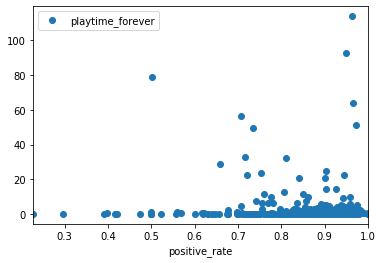

In [12]:
df.plot(x='positive_rate',y='playtime_forever',style='o')

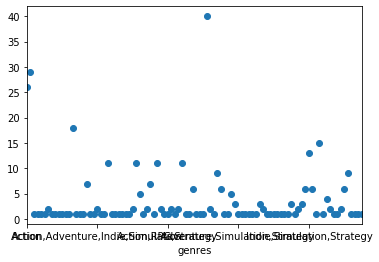

In [13]:
df.groupby('genres')['positive_rate'].nunique().plot(style='o')
plt.show()

## Plots after basic preprocessing

In [14]:
df.head()

,id,playtime_forever,is_free,price,genres,categories,tags,diff_day,diff_year,negative_rate,positive_rate,total_reviews
0,0,0.000000,0,3700.0,"Adventure,Casual,Indie","Single-player,Steam Trading Cards,Steam Cloud","Indie,Adventure,Story Rich,Casual,Atmospheric,...",1665,5,0.205128,0.794872,468.0
1,1,0.016667,1,0.0,RPG,"Single-player,Partial Controller Support","Mod,Utilities,RPG,Game Development,Singleplaye...",472,1,0.000000,1.000000,23.0
2,2,0.000000,0,5000.0,"Adventure,Casual,Indie","Single-player,Full controller support,Steam Tr...","Point & Click,Adventure,Story Rich,Comedy,Indi...",1616,4,0.180114,0.819886,3681.0
3,3,1.533333,0,9900.0,"Action,RPG","Single-player,Multi-player,Steam Achievements,...","Medieval,RPG,Open World,Strategy,Sandbox,Actio...",2434,6,0.026934,0.973066,64824.0
4,4,22.333333,0,4800.0,"Action,Indie,Strategy","Single-player,Co-op,Steam Achievements,Full co...","Tower Defense,Co-op,Action,Strategy,Online Co-...",2043,6,0.055852,0.944148,9364.0


In [15]:
df.describe()

,id,playtime_forever,is_free,price,diff_day,diff_year,negative_rate,positive_rate,total_reviews
count,355.000000,355.000000,355.000000,3.550000e+02,355.000000,355.000000,355.000000,355.000000,355.000000
mean,178.774648,3.128545,0.087324,7.154788e+04,1006.647887,2.763380,0.157140,0.842860,18705.107042
std,102.937532,11.243515,0.282708,9.254761e+05,913.112571,2.599502,0.121543,0.121543,63694.715761
min,0.000000,0.000000,0.000000,0.000000e+00,-481.000000,-2.000000,0.000000,0.227224,0.000000
25%,90.500000,0.000000,0.000000,3.600000e+03,364.000000,1.000000,0.075771,0.796463,938.000000
50%,179.000000,0.083333,0.000000,6.800000e+03,775.000000,2.000000,0.129231,0.870769,3363.000000
75%,267.500000,1.575000,0.000000,9.000000e+03,1458.500000,4.000000,0.203537,0.924229,11161.000000
max,356.000000,113.800000,1.000000,1.599990e+07,4320.000000,12.000000,0.772776,1.000000,876948.000000


#variables pairplot
print('Variables pairplot:')
variables = ['playtime_forever','is_free','price','negative_rate','positive_rate','diff_day']
sns_plot = sns.pairplot(df[variables])
plt.show()

In [16]:
df.genres.value_counts().head()

Adventure,Indie           40
Action,Adventure          29
Action                    26
Action,Adventure,Indie    18
RPG                       15
Name: genres, dtype: int64

In [17]:
df.categories.value_counts().head()

Single-player,Steam Achievements,Full controller support,Steam Trading Cards,Steam Cloud    39
Single-player,Steam Achievements,Steam Trading Cards,Steam Cloud                            22
Single-player                                                                               20
Single-player,Steam Achievements,Steam Trading Cards                                        11
Single-player,Steam Achievements,Full controller support,Steam Cloud                        11
Name: categories, dtype: int64

In [18]:
# deal with genres, categories, tags
genres = df["genres"].str.get_dummies(",")
categories = df["categories"].str.get_dummies(",") 
tags = df["tags"].str.get_dummies(",") 
finish_df = pd.concat([df, genres, categories, tags], axis=1)
finish_df.head()

,id,playtime_forever,is_free,price,genres,categories,tags,diff_day,diff_year,negative_rate,...,Voxel,Walking Simulator,War,Wargame,Warhammer 40K,Western,World War I,World War II,Zombies,eSports
0,0,0.000000,0,3700.0,"Adventure,Casual,Indie","Single-player,Steam Trading Cards,Steam Cloud","Indie,Adventure,Story Rich,Casual,Atmospheric,...",1665,5,0.205128,...,0,1,0,0,0,0,0,0,0,0
1,1,0.016667,1,0.0,RPG,"Single-player,Partial Controller Support","Mod,Utilities,RPG,Game Development,Singleplaye...",472,1,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,2,0.000000,0,5000.0,"Adventure,Casual,Indie","Single-player,Full controller support,Steam Tr...","Point & Click,Adventure,Story Rich,Comedy,Indi...",1616,4,0.180114,...,0,0,0,0,0,0,0,0,0,0
3,3,1.533333,0,9900.0,"Action,RPG","Single-player,Multi-player,Steam Achievements,...","Medieval,RPG,Open World,Strategy,Sandbox,Actio...",2434,6,0.026934,...,0,0,0,0,0,0,0,0,0,0
4,4,22.333333,0,4800.0,"Action,Indie,Strategy","Single-player,Co-op,Steam Achievements,Full co...","Tower Defense,Co-op,Action,Strategy,Online Co-...",2043,6,0.055852,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# delete useless columns
finish_df.drop(columns=["id", "is_free", "genres", "categories", "tags"], inplace=True)
finish_df.head()

,playtime_forever,price,diff_day,diff_year,negative_rate,positive_rate,total_reviews,Action,Adventure,Animation & Modeling,...,Voxel,Walking Simulator,War,Wargame,Warhammer 40K,Western,World War I,World War II,Zombies,eSports
0,0.000000,3700.0,1665,5,0.205128,0.794872,468.0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0.016667,0.0,472,1,0.000000,1.000000,23.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,5000.0,1616,4,0.180114,0.819886,3681.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1.533333,9900.0,2434,6,0.026934,0.973066,64824.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,22.333333,4800.0,2043,6,0.055852,0.944148,9364.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# change price and total_reviews to type(int)
finish_df[["total_reviews", "price"]] = finish_df[["total_reviews", "price"]].astype("int")
finish_df.head()

,playtime_forever,price,diff_day,diff_year,negative_rate,positive_rate,total_reviews,Action,Adventure,Animation & Modeling,...,Voxel,Walking Simulator,War,Wargame,Warhammer 40K,Western,World War I,World War II,Zombies,eSports
0,0.000000,3700,1665,5,0.205128,0.794872,468,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0.016667,0,472,1,0.000000,1.000000,23,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,5000,1616,4,0.180114,0.819886,3681,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1.533333,9900,2434,6,0.026934,0.973066,64824,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,22.333333,4800,2043,6,0.055852,0.944148,9364,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Outliers

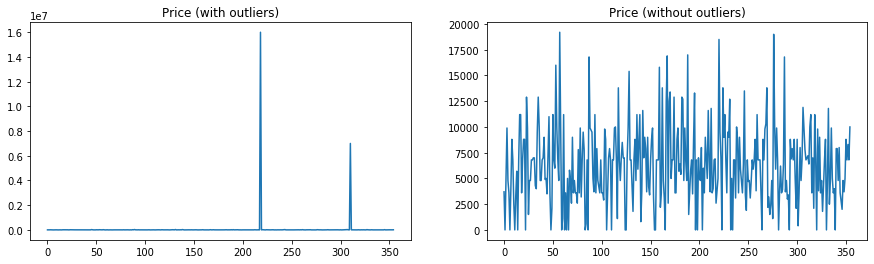

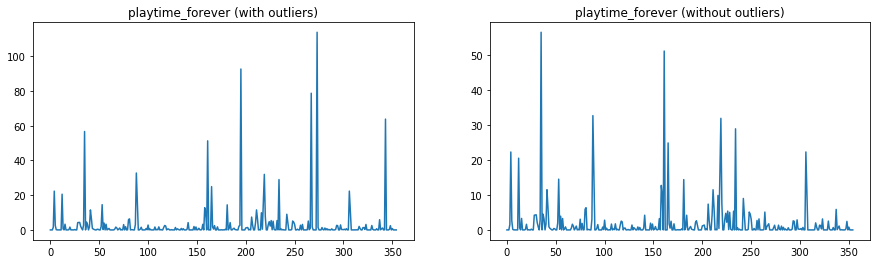

In [21]:
#Dropping the outlier rows with standard deviation
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    tolerance = 2
    fence_low  = q1 - tolerance*iqr
    fence_high = q3 + tolerance*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

# Column: 'price'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
ax1.plot(finish_df['price'])
ax1.set_title('Price (with outliers)')

finish_df = remove_outlier(finish_df,'price')

ax2.plot(finish_df['price'])
ax2.set_title('Price (without outliers)')

plt.show()

# Column: 'playtime_forever'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
ax1.plot(finish_df['playtime_forever'])
ax1.set_title('playtime_forever (with outliers)')

finish_df = finish_df[finish_df['playtime_forever'] < 60]

ax2.plot(finish_df['playtime_forever'])
ax2.set_title('playtime_forever (without outliers)')

plt.show()
    
# ------------- Reset index -------------
finish_df.reset_index(inplace=True, drop=True)

In [22]:
print('Dataset shape: ', finish_df.shape)
print(finish_df.info())
finish_df.head(5)

Dataset shape:  (339, 368)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Columns: 368 entries, playtime_forever to eSports
dtypes: float64(3), int32(2), int64(363)
memory usage: 972.1 KB
None


,playtime_forever,price,diff_day,diff_year,negative_rate,positive_rate,total_reviews,Action,Adventure,Animation & Modeling,...,Voxel,Walking Simulator,War,Wargame,Warhammer 40K,Western,World War I,World War II,Zombies,eSports
0,0.000000,3700,1665,5,0.205128,0.794872,468,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0.016667,0,472,1,0.000000,1.000000,23,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,5000,1616,4,0.180114,0.819886,3681,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1.533333,9900,2434,6,0.026934,0.973066,64824,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,22.333333,4800,2043,6,0.055852,0.944148,9364,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Preprocess Test Data

In [23]:
# Reading the test data
test_df = pd.read_csv('test.csv', parse_dates = ['purchase_date', 'release_date'])
print('Test data shape: ', test_df.shape)
print(test_df.info())
test_df.head(2)

Test data shape:  (90, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 10 columns):
id                        90 non-null int64
is_free                   90 non-null bool
price                     90 non-null int64
genres                    90 non-null object
categories                90 non-null object
tags                      90 non-null object
purchase_date             88 non-null datetime64[ns]
release_date              90 non-null datetime64[ns]
total_positive_reviews    88 non-null float64
total_negative_reviews    88 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(2), int64(2), object(3)
memory usage: 6.5+ KB
None


,id,is_free,price,genres,categories,tags,purchase_date,release_date,total_positive_reviews,total_negative_reviews
0,0,False,3500,"Action,Adventure","Single-player,Full controller support","Action,Adventure,Horror,Third Person,Singlepla...",2018-10-28,2012-05-22,2607.0,1122.0
1,1,False,11600,"Action,Adventure,Strategy","Single-player,Multi-player,Online Multi-Player...","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...",2019-07-20,2018-04-24,5762.0,2235.0


In [24]:
test_df["purchase_date"] = pd.to_datetime(test_df["purchase_date"])
test_df["release_date"] = pd.to_datetime(test_df["release_date"])

test_df["diff_day"] = test_df.apply(lambda raw: (raw["purchase_date"] - raw["release_date"]).days, axis=1)

# get the different years between purchase_date and release_date
test_df["diff_year"] = test_df["purchase_date"].dt.year - test_df["release_date"].dt.year

# delete purchase_date and release_date
test_df.drop(columns=["purchase_date", "release_date"], inplace=True)

test_df.head()

,id,is_free,price,genres,categories,tags,total_positive_reviews,total_negative_reviews,diff_day,diff_year
0,0,False,3500,"Action,Adventure","Single-player,Full controller support","Action,Adventure,Horror,Third Person,Singlepla...",2607.0,1122.0,2350.0,6.0
1,1,False,11600,"Action,Adventure,Strategy","Single-player,Multi-player,Online Multi-Player...","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...",5762.0,2235.0,452.0,1.0
2,2,False,2100,"Indie,Simulation,Strategy","Single-player,Steam Achievements,Steam Trading...","Strategy,Simulation,Indie,Political,Cold War,P...",687.0,133.0,848.0,2.0
3,3,False,3600,"Action,Strategy","Single-player,Multi-player,Co-op","Strategy,Action,Military,Tactical",67.0,39.0,3850.0,11.0
4,4,False,3400,"Action,Adventure","Single-player,Co-op,Steam Achievements,Full co...","Open World,Action,Comedy,Co-op,Third-Person Sh...",40344.0,3708.0,1282.0,4.0


In [25]:
test_df["diff_year"].fillna(test_df["diff_year"].median(), inplace=True)
test_df["diff_day"].fillna(test_df["diff_day"].median(), inplace=True)
test_df["total_positive_reviews"].fillna(test_df["total_positive_reviews"].median(), inplace=True)
test_df["total_negative_reviews"].fillna(test_df["total_negative_reviews"].median(), inplace=True)

test_df.dropna(inplace=True)
test_df.reset_index(drop=True, inplace=True)


# Replacing columns with f/t with 0/1
test_df.replace({False: 0, True: 1}, inplace=True)
test_df.head()


,id,is_free,price,genres,categories,tags,total_positive_reviews,total_negative_reviews,diff_day,diff_year
0,0,0,3500,"Action,Adventure","Single-player,Full controller support","Action,Adventure,Horror,Third Person,Singlepla...",2607.0,1122.0,2350.0,6.0
1,1,0,11600,"Action,Adventure,Strategy","Single-player,Multi-player,Online Multi-Player...","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...",5762.0,2235.0,452.0,1.0
2,2,0,2100,"Indie,Simulation,Strategy","Single-player,Steam Achievements,Steam Trading...","Strategy,Simulation,Indie,Political,Cold War,P...",687.0,133.0,848.0,2.0
3,3,0,3600,"Action,Strategy","Single-player,Multi-player,Co-op","Strategy,Action,Military,Tactical",67.0,39.0,3850.0,11.0
4,4,0,3400,"Action,Adventure","Single-player,Co-op,Steam Achievements,Full co...","Open World,Action,Comedy,Co-op,Third-Person Sh...",40344.0,3708.0,1282.0,4.0


In [26]:
# change reviews to rates
test_df["negative_rate"] = test_df.apply(lambda raw: raw["total_negative_reviews"]\
                                               /(raw["total_negative_reviews"] + raw["total_positive_reviews"])\
                                               if raw["total_negative_reviews"] + raw["total_positive_reviews"] != 0\
                                               else 0.5, axis=1)
test_df["positive_rate"] = test_df.apply(lambda raw: raw["total_positive_reviews"]\
                                               /(raw["total_negative_reviews"] + raw["total_positive_reviews"])\
                                               if raw["total_negative_reviews"] + raw["total_positive_reviews"] != 0\
                                               else 0.5, axis=1)
test_df["total_reviews"] = test_df.apply(lambda raw: (raw["total_negative_reviews"] + raw["total_positive_reviews"]),\
                                               axis=1)

# delete total_positive_reviews and total_negative_reviews
test_df.drop(columns=["total_positive_reviews", "total_negative_reviews"], inplace=True)
test_df.head()

,id,is_free,price,genres,categories,tags,diff_day,diff_year,negative_rate,positive_rate,total_reviews
0,0,0,3500,"Action,Adventure","Single-player,Full controller support","Action,Adventure,Horror,Third Person,Singlepla...",2350.0,6.0,0.300885,0.699115,3729.0
1,1,0,11600,"Action,Adventure,Strategy","Single-player,Multi-player,Online Multi-Player...","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...",452.0,1.0,0.279480,0.720520,7997.0
2,2,0,2100,"Indie,Simulation,Strategy","Single-player,Steam Achievements,Steam Trading...","Strategy,Simulation,Indie,Political,Cold War,P...",848.0,2.0,0.162195,0.837805,820.0
3,3,0,3600,"Action,Strategy","Single-player,Multi-player,Co-op","Strategy,Action,Military,Tactical",3850.0,11.0,0.367925,0.632075,106.0
4,4,0,3400,"Action,Adventure","Single-player,Co-op,Steam Achievements,Full co...","Open World,Action,Comedy,Co-op,Third-Person Sh...",1282.0,4.0,0.084173,0.915827,44052.0


In [27]:
# chategorial variable transformation using dummies
genres_test = test_df["genres"].str.get_dummies(",")
categories_test = test_df["categories"].str.get_dummies(",") 
tags_test = test_df["tags"].str.get_dummies(",") 
finish_test_df = pd.concat([test_df, genres, categories, tags], axis=1)
finish_test_df.head()

,id,is_free,price,genres,categories,tags,diff_day,diff_year,negative_rate,positive_rate,...,Voxel,Walking Simulator,War,Wargame,Warhammer 40K,Western,World War I,World War II,Zombies,eSports
0,0.0,0.0,3500.0,"Action,Adventure","Single-player,Full controller support","Action,Adventure,Horror,Third Person,Singlepla...",2350.0,6.0,0.300885,0.699115,...,0,1,0,0,0,0,0,0,0,0
1,1.0,0.0,11600.0,"Action,Adventure,Strategy","Single-player,Multi-player,Online Multi-Player...","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...",452.0,1.0,0.279480,0.720520,...,0,0,0,0,0,0,0,0,0,0
2,2.0,0.0,2100.0,"Indie,Simulation,Strategy","Single-player,Steam Achievements,Steam Trading...","Strategy,Simulation,Indie,Political,Cold War,P...",848.0,2.0,0.162195,0.837805,...,0,0,0,0,0,0,0,0,0,0
3,3.0,0.0,3600.0,"Action,Strategy","Single-player,Multi-player,Co-op","Strategy,Action,Military,Tactical",3850.0,11.0,0.367925,0.632075,...,0,0,0,0,0,0,0,0,0,0
4,4.0,0.0,3400.0,"Action,Adventure","Single-player,Co-op,Steam Achievements,Full co...","Open World,Action,Comedy,Co-op,Third-Person Sh...",1282.0,4.0,0.084173,0.915827,...,0,0,0,0,0,0,0,0,0,0


In [28]:
finish_test_df.drop(columns=["id","is_free", "genres", "categories", "tags"], inplace=True)

In [75]:
# change price and total_reviews to type(int)
finish_test_df[["total_reviews", "price"]] = finish_df[["total_reviews", "price"]].astype("int")
finish_test_df.head()

,price,diff_day,diff_year,negative_rate,positive_rate,total_reviews,Action,Adventure,Animation & Modeling,Audio Production,...,Voxel,Walking Simulator,War,Wargame,Warhammer 40K,Western,World War I,World War II,Zombies,eSports
0,3700.0,2350.0,6.0,0.300885,0.699115,468.0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0.0,452.0,1.0,0.279480,0.720520,23.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5000.0,848.0,2.0,0.162195,0.837805,3681.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9900.0,3850.0,11.0,0.367925,0.632075,64824.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4800.0,1282.0,4.0,0.084173,0.915827,9364.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Splitting the dataset into Training set and Test set


In [30]:
train_x = finish_df.drop(['playtime_forever'], axis=1)
train_y = finish_df['playtime_forever']
test_x = finish_test_df

In [78]:
print(train_x.shape,test_x.shape,train_y.shape)

(339, 367) (355, 367) (339,)


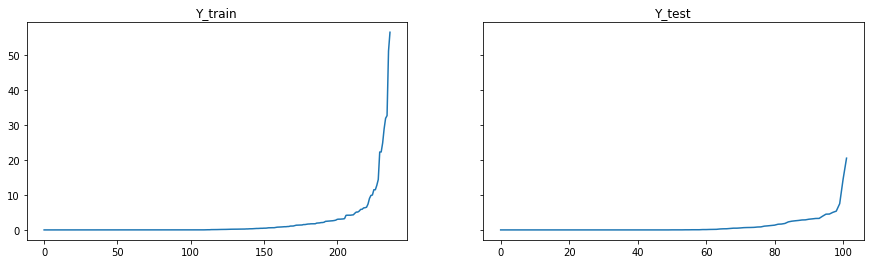

In [93]:
# Dataset split with stratification

X_train, X_test, Y_train, Y_test = train_test_split(train_x,train_y, test_size=0.3,random_state=0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4), sharey=True)
ax1.plot(np.sort(Y_train))
ax1.set_title('Y_train')

ax2.plot(np.sort(Y_test))
ax2.set_title('Y_test')

plt.show()

In [94]:
print(X_train.shape,X_test.shape,Y_test.shape,Y_train.shape)

(237, 367) (102, 367) (102,) (237,)


## Normalization

In [120]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
X_train = mm_scaler.fit_transform(X_train)
X_test = mm_scaler.fit_transform(X_test)

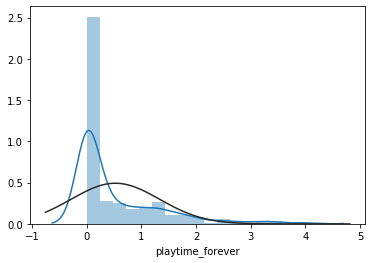

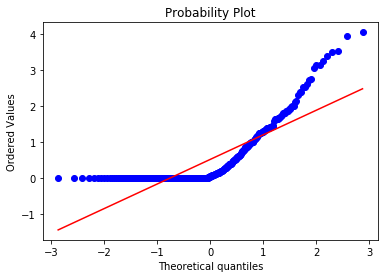

In [121]:
from scipy import stats
from scipy.stats import  norm
def plot_y(train_y1):
    train_y1=np.log(train_y+1)
    sns.distplot( train_y1, fit=norm)
    fig = plt.figure()
    res = stats.probplot(train_y1, plot=plt)
plot_y(Y_train)

# Feature Selection

In [122]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

k = 10
Kbestfeatures = SelectKBest(score_func=f_regression, k=k)
fit = Kbestfeatures.fit(X_train,Y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(train_x.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(k,'Score'))  #print K best features

best_features = featureScores.nlargest(k,'Score')['Specs'].tolist()

             Specs      Score
5    total_reviews  32.049332
119       Crafting  19.817481
92        Building  17.965708
285        Sandbox  14.289056
18             RPG  13.970592
111          Co-op  13.049248
265            RPG  12.256323
110        Clicker  11.851959
320       Survival  11.419075
153    Exploration  11.026493


C:\Users\Kabir\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Kabir\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Kabir\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Kabir\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [123]:
best_feature_train = train_x[best_features]
best_feature_test = test_x[best_features]

In [129]:
X_train_best, X_test_best, Y_train, Y_test = train_test_split(best_feature_train,train_y, test_size=0.3,random_state=0)

In [131]:
mm_scaler = preprocessing.MinMaxScaler()
X_train_best = mm_scaler.fit_transform(X_train_best)
X_test_best = mm_scaler.fit_transform(X_test_best)

In [132]:
print(X_train_best.shape,X_test_best.shape,Y_test.shape,Y_train.shape)

(237, 13) (102, 13) (102,) (237,)


In [100]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import PassiveAggressiveRegressor 
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import SGDRegressor 
from sklearn.linear_model import TheilSenRegressor 

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor


from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.svm import SVR

In [101]:
def allmodel():
    classifiers = [
    AdaBoostRegressor(),
    BaggingRegressor(),
    ExtraTreesRegressor(),
    GradientBoostingRegressor(),
    RandomForestRegressor(),
    PassiveAggressiveRegressor(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    ExtraTreeRegressor()
]
    names = [
    "AdaBoostRegressor",
    "BaggingRegressor",
    "ExtraTreesRegressor",
    "GradientBoostingRegressor",
    "RandomForestRegressor",
    "PassiveAggressiveRegressor",
    "KNeighborsRegressor",
    "DecisionTreeRegressor",
    "ExtraTreeRegressor"
]
    return classifiers,names
classifiers,names=allmodel()

In [102]:
from sklearn.metrics import mean_squared_error
def rmse(xx,xxx):
    return mean_squared_error(xx,xxx)**0.5


In [103]:
for i in range(10):  
    result=[]
    for clf,name in zip(classifiers,names):
        clf.fit(X_train, Y_train)
        a=clf.predict(X_test)
        a[a<0]=0
        result.append(rmse(a,Y_test))
    #    print(name, rmse(clf.predict(X_test),y_test)
    model_result=pd.DataFrame(data=result,index=names,columns=['rmse']).sort_values(by="rmse" , ascending=True)
    print(model_result)

C:\Users\Kabir\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Kabir\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


                                rmse
KNeighborsRegressor         3.057698
BaggingRegressor            3.793514
AdaBoostRegressor           4.044572
ExtraTreesRegressor         4.245442
RandomForestRegressor       5.068402
GradientBoostingRegressor   5.454670
ExtraTreeRegressor          5.921308
PassiveAggressiveRegressor  7.957632
DecisionTreeRegressor       8.253883
                                rmse
KNeighborsRegressor         3.057698
ExtraTreesRegressor         3.205922
AdaBoostRegressor           4.104417
BaggingRegressor            5.171510
RandomForestRegressor       5.377037
GradientBoostingRegressor   5.382850
PassiveAggressiveRegressor  7.832454
DecisionTreeRegressor       8.323920
ExtraTreeRegressor          8.519688
                                 rmse
KNeighborsRegressor          3.057698
ExtraTreesRegressor          3.796407
ExtraTreeRegressor           4.754539
AdaBoostRegressor            4.962877
GradientBoostingRegressor    5.167363
RandomForestRegressor        5.2

In [104]:
a.shape

(102,)

In [134]:
import xgboost as xgb
xgboost_model = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05, max_depth=3, min_child_weight=1.7817, n_estimators=2200, reg_alpha=0.4640, reg_lambda=0.8571, subsample=0.5213, silent=1, random_state =7, nthread = -1)
xgboost_model.fit(X_train_best,Y_train)
a = xgboost_model.predict(X_test_best)
a[a<0]=0
result.append(rmse(a,Y_test))
print('XBG:',mean_squared_error(Y_test,a)**0.5)

C:\Users\Kabir\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XBG: 4.837920337082917


In [135]:
sub_with_feature_selection=pd.DataFrame({'id':np.arange(90),'playtime_forever':a[0:90]})
sub_with_feature_selection.to_csv('sub_XBG_Feature_Selection.csv',index=False)

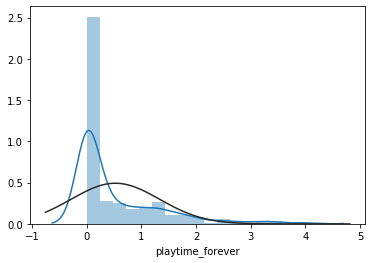

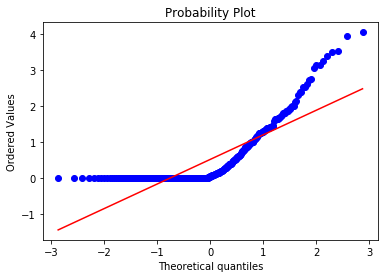

In [106]:
np.mean(y_pred)
plot_y(y_pred)

In [107]:
clf=KNeighborsRegressor()
clf.fit(X_train,Y_train)
a=clf.predict(X_test)
a[a<0]=0
result.append(rmse(a,Y_test))


In [112]:
sub=pd.DataFrame({'id':np.arange(90),'playtime_forever':a[0:90]})
sub.to_csv('sub_KNeighborsRegressor.csv',index=False)

In [114]:
sub.describe()

,id,playtime_forever
count,90.000000,90.000000
mean,44.500000,1.815815
std,26.124701,3.022838
min,0.000000,0.000000
25%,22.250000,0.046667
50%,44.500000,0.433333
75%,66.750000,2.393333
max,89.000000,14.480000
